# Overfitting

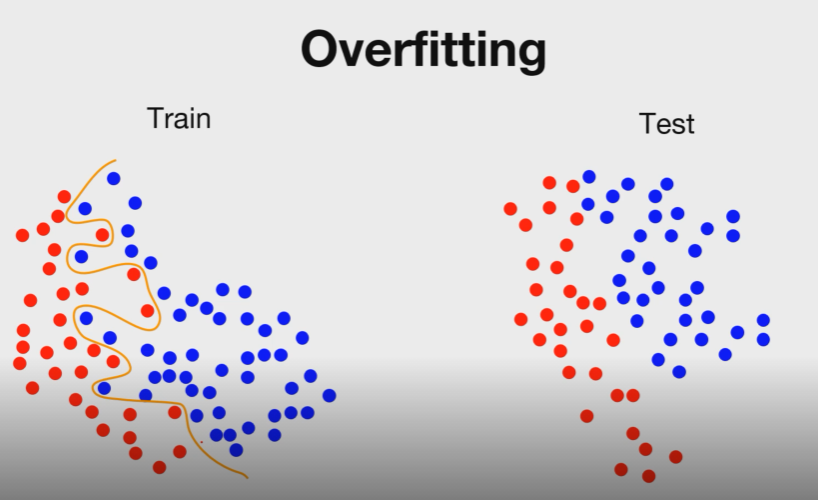

train set이 overfitting 됐을 경우, Test set은 전혀 다른 데이터이기 떄문에 오히려
성능이 떨어질 수 있음

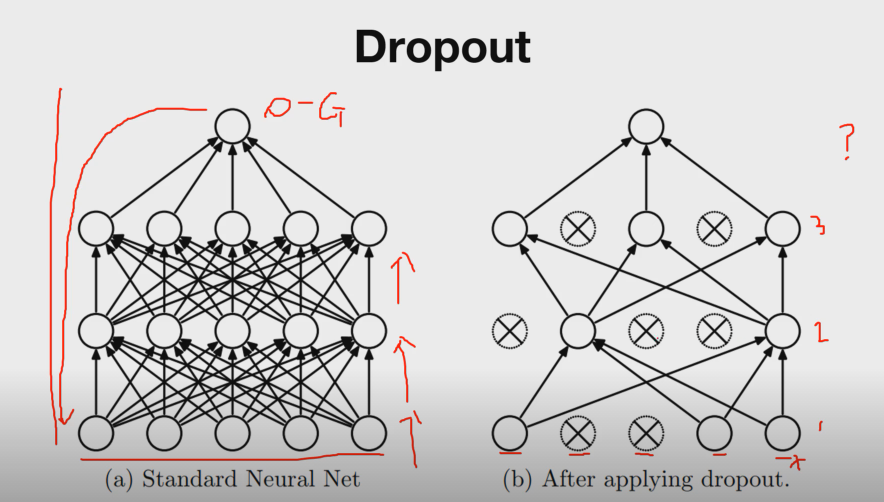

무작위 노드 선택 후 3개의 w만을 사용하여 최종 output을 구해
output과 gradient의 차이를 통해 network 업데이트 

실제 test를 할 때는 전체 train set이 사용되기 때문에 .train() 실제로 drop out을 선택해서 사용하겠다 or .eval()-전체 노드를 사용하겠다 을 사용해야함.- 사전 선언이 필요.


In [1]:
import torch
import torchvision.datasets as dsets
import torchvision.transforms as transforms
import random

In [2]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# for reproducibility
random.seed(111)
torch.manual_seed(777)
if device == 'cuda':
    torch.cuda.manual_seed_all(777)

In [3]:

# parameters
learning_rate = 0.001
training_epochs = 15
batch_size = 100
drop_prob = 0.3

In [4]:
# MNIST dataset
mnist_train = dsets.MNIST(root='MNIST_data/',
                          train=True,
                          transform=transforms.ToTensor(),
                          download=True)

mnist_test = dsets.MNIST(root='MNIST_data/',
                         train=False,
                         transform=transforms.ToTensor(),
                         download=True)

C:\ProgramData\Miniconda3\lib\site-packages\torchvision\datasets\mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ..\torch\csrc\utils\tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [5]:
# dataset loader
data_loader = torch.utils.data.DataLoader(dataset=mnist_train,
                                          batch_size=batch_size,
                                          shuffle=True,
                                          drop_last=True)

In [6]:
linear1 = torch.nn.Linear(784, 512, bias=True)
linear2 = torch.nn.Linear(512, 512, bias=True)
linear3 = torch.nn.Linear(512,512, bias=True)
linear4 = torch.nn.Linear(512, 512, bias=True)
linear5 = torch.nn.Linear(512, 10, bias=True)
relu = torch.nn.ReLU()
dropout = torch.nn.Dropout(p=drop_prob)

In [7]:
torch.nn.init.xavier_uniform(linear1.weight)
torch.nn.init.xavier_uniform(linear2.weight)
torch.nn.init.xavier_uniform(linear3.weight)
torch.nn.init.xavier_uniform(linear4.weight)
torch.nn.init.xavier_uniform(linear5.weight)

<ipython-input-7-014ee2a66e20>:1: UserWarning: nn.init.xavier_uniform is now deprecated in favor of nn.init.xavier_uniform_.
  torch.nn.init.xavier_uniform(linear1.weight)
<ipython-input-7-014ee2a66e20>:2: UserWarning: nn.init.xavier_uniform is now deprecated in favor of nn.init.xavier_uniform_.
  torch.nn.init.xavier_uniform(linear2.weight)
<ipython-input-7-014ee2a66e20>:3: UserWarning: nn.init.xavier_uniform is now deprecated in favor of nn.init.xavier_uniform_.
  torch.nn.init.xavier_uniform(linear3.weight)
<ipython-input-7-014ee2a66e20>:4: UserWarning: nn.init.xavier_uniform is now deprecated in favor of nn.init.xavier_uniform_.
  torch.nn.init.xavier_uniform(linear4.weight)
<ipython-input-7-014ee2a66e20>:5: UserWarning: nn.init.xavier_uniform is now deprecated in favor of nn.init.xavier_uniform_.
  torch.nn.init.xavier_uniform(linear5.weight)


Parameter containing:
tensor([[-0.0565,  0.0423, -0.0155,  ...,  0.1012,  0.0459, -0.0191],
        [ 0.0772,  0.0452, -0.0638,  ...,  0.0476, -0.0638,  0.0528],
        [ 0.0311, -0.1023, -0.0701,  ...,  0.0412, -0.1004,  0.0738],
        ...,
        [ 0.0334,  0.0187, -0.1021,  ...,  0.0280, -0.0583, -0.1018],
        [-0.0506, -0.0939, -0.0467,  ..., -0.0554, -0.0325,  0.0640],
        [-0.0183, -0.0123,  0.1025,  ..., -0.0214,  0.0220, -0.0741]],
       requires_grad=True)

In [8]:
# model
model = torch.nn.Sequential(linear1, relu, dropout,
                            linear2, relu, dropout,
                            linear3, relu, dropout,
                            linear4, relu, dropout,
                            linear5).to(device)

In [9]:
with torch.no_grad():
    model.eval() # set the modle to evaluation mode (dropout=False)
    
    X_test = mnist_test.test_data.view(-1,28*28).float().to(device)
    Y_test = mnist_test.test_labels.to(device)
    
    prediction = model(X_test)
    correct_prediction = torch.argmax(prediction, 1)==Y_test
    accuracy = correct_prediction.float().mean()
    print('Accuracy',accuracy.item())
    
    r = random.randint(0,len(mnist_test) -1 )
    X_single_data = mnist_test.test_data[r:r+1].view(-1,28*28).float().to(device)
    Y_single_data = mnist_test.test_labels[r:r+1].to(device)
                       
    print('Label', Y_single_data.item())
    single_prediction = model(X_single_data)
    print('Prediction:',torch.argmax(single_prediction,1).item())

C:\ProgramData\Miniconda3\lib\site-packages\torchvision\datasets\mnist.py:67: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
C:\ProgramData\Miniconda3\lib\site-packages\torchvision\datasets\mnist.py:57: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


Accuracy 0.0934000015258789
Label 9
Prediction: 6
